In [1]:
# Youtube link: https://www.youtube.com/watch?v=_ZEWDGpM-vM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&index=2&t=0s
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

embed_video(1)

In [2]:
import os
import pandas as pd

from urllib.request import urlretrieve
# put the plot inside notebook instead of seperate window
%matplotlib inline

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename = 'Fremont.csv', url = URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
        
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

In [3]:
data = get_fremont_data()

In [4]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
06/30/2019 11:00:00 PM,7,15
06/30/2019 10:00:00 PM,20,30
06/30/2019 09:00:00 PM,31,32
06/30/2019 08:00:00 PM,72,58
06/30/2019 07:00:00 PM,58,77
06/30/2019 06:00:00 PM,68,139
06/30/2019 05:00:00 PM,84,148
06/30/2019 04:00:00 PM,148,183
06/30/2019 03:00:00 PM,145,216


In [5]:
data.head()

,West,East,Total
Date,,,
2019-06-30 23:00:00,7.0,15.0,22.0
2019-06-30 22:00:00,20.0,30.0,50.0
2019-06-30 21:00:00,31.0,32.0,63.0
2019-06-30 20:00:00,72.0,58.0,130.0
2019-06-30 19:00:00,58.0,77.0,135.0


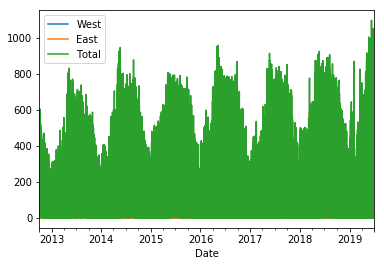

In [6]:
data.plot()

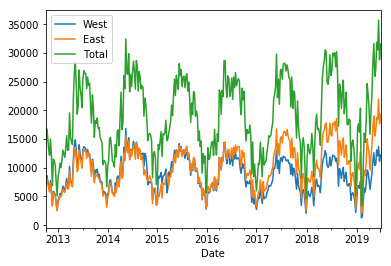

In [7]:
data.resample('W').sum().plot();

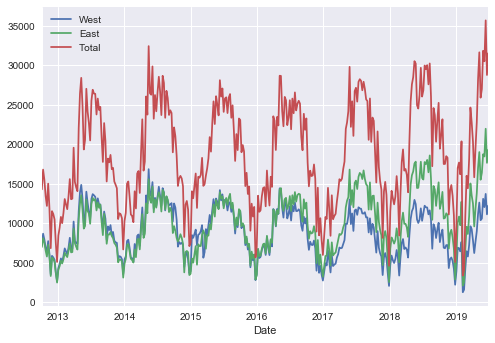

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.resample('W').sum().plot();

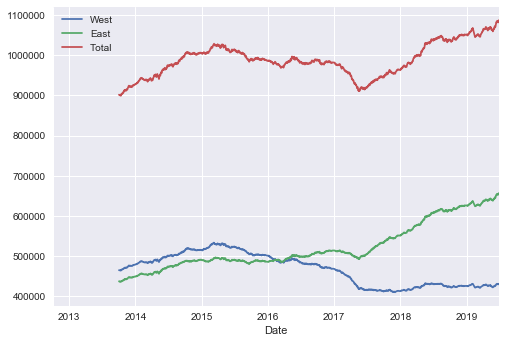

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot();

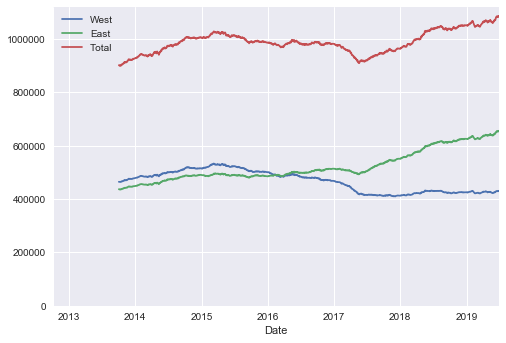

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

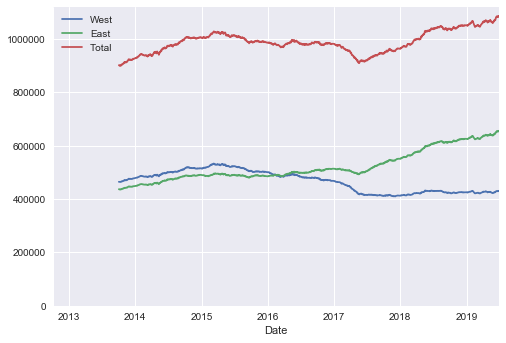

In [11]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

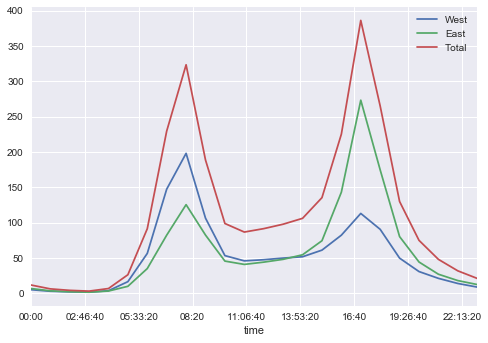

In [12]:
data.groupby(data.index.time).mean().plot()

In [13]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [14]:
# pivoted.plot()